### 워드클라우드에 사용할 데이타 가져오기

In [1]:
import pandas as pd
df = pd.read_csv('news.csv', engine='python', encoding='utf-8')

In [2]:
sample_title = df['title'][:2]
sample_title

0     이재명, 배달의민족 저격 "힘 좀 가졌다고…독과점 횡포 시작"
1    식목일에 강릉 간 文대통령 부부, 산불 피해지에 금강소나무 심어
Name: title, dtype: object

In [3]:
sample_content = df['contents'][:2]
sample_content

0    이재명 경기도지사가 배달앱 플랫폼 배달의민족을 비판하는 글을 지난 4일 오후 페이스...
1    작년 산불 피해 주민 등 40여명과 함께 식수文대통령 든 삽은 산불 피해 나무로 만...
Name: contents, dtype: object

### 자신의 관심사에 맞는 단어로 데이터를 가져옵니다.

In [5]:
df.shape

(60, 4)

In [4]:
import re
p = '.*(코로나|여행|비행기|호텔).*'  # . 임의의 문자 한개에 대응, * 0개 이상 
topic = df[df['title'].str.match(p)|df['contents'].str.match(p, flags=re.MULTILINE)]
topic.shape

(42, 4)

In [9]:
topic.head() # topic.tail() topic.sample(3)

,Unnamed: 0,title,href,contents
0,0,이재명 ‘배민’ 손본다..독과점 배달앱 횡포 억제,/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,아이디어 제안해달라다수약자 보호·공정한 경제질서가 국가의 역할“경기도 배달앱 만들자...
1,1,"이낙연-황교안…“미워 않겠다, 미워 말라”·“무능정권 미워한다”",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,"4.15 총선 공식 선거운동 시작 뒤 첫 주말인 4일 민주당 이낙연, 통합당 황교안..."
2,2,이재명 “’코로나19’ 방역당국의 전례없는 대처에도 불구하고 감염속도 너무 빠르다”,/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,미국 비롯 전세계 감염 확산일로로 치닫고 있는데 대한 우려로 풀이돼 이재명 경기도...
3,3,"하노이행 여객기 회항시켰던 베트남, 文 전화에 “코로나19 협력하자”",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,베트남 총리가 문재인 대통령과의 전화 통화에서 한국의 코로나19 진단 검사가 국제적...
4,4,"이낙연 ""미워하지 말아달라""…황교안 ""미워한다. 완전 망했다""",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,[이미지출처=연합뉴스][아시아경제 박철응 기자] 서울 종로 지역구에 출마한 이낙연 ...


### 워드클라우드에서 제외하고 싶은 단어

In [6]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가','그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무','[',']','것으로','했습니다','했다','있다','있는'] 

### 워드클라우드 작성 함수

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        #font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        font_path = '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothic.ttf',
                        stopwords = stopwords_kr,
                        background_color = backgroundcolor, 
                        width = width, height = height).generate(data)
    #print(wordcloud.words_)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

- list = str.split() : 문자열 => 리스트, 공백시 스페이스 기준
- ' '.join( list ) : 리스트에서 문자열으로

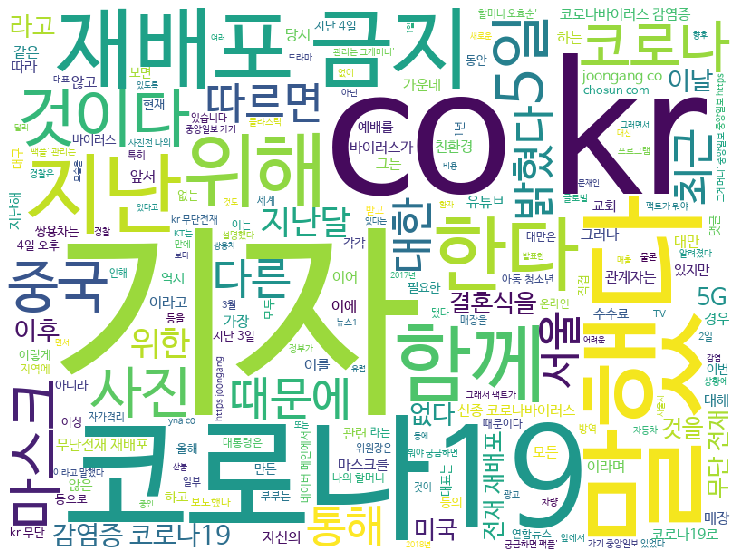

CPU times: user 969 ms, sys: 78.5 ms, total: 1.05 s
Wall time: 1.11 s


In [8]:
%time displayWordCloud(' '.join(df['contents']))

### soynlp이용하여 명사추출

In [9]:
from soynlp.noun import LRNounExtractor

In [10]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(df['contents'])
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (2194, 1198) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 524 nouns are extracted
CPU times: user 270 ms, sys: 2.91 ms, total: 273 ms
Wall time: 275 ms


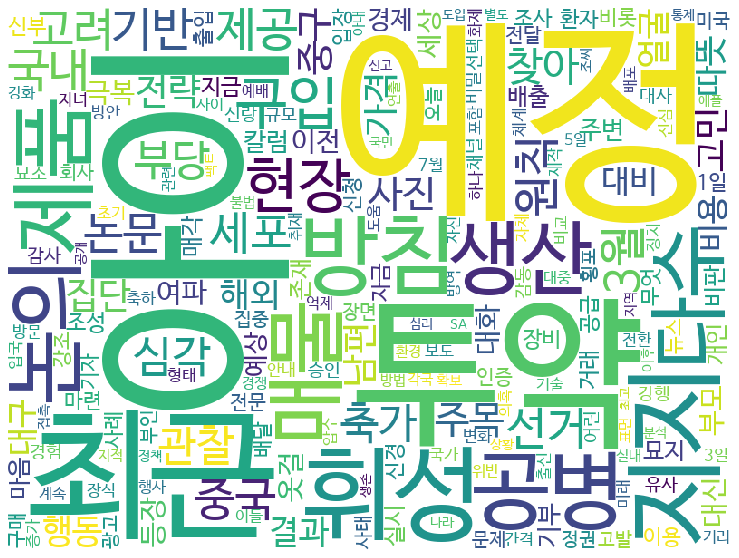

CPU times: user 857 ms, sys: 71.8 ms, total: 929 ms
Wall time: 933 ms


In [11]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))

### 특정 이미지 형태로 워드 클라우드 그리기

In [12]:
# 이미지 파일위에 출력하기
from PIL import Image
import numpy

In [13]:
img = Image.open('cloud.png')
img_array=numpy.array(img)

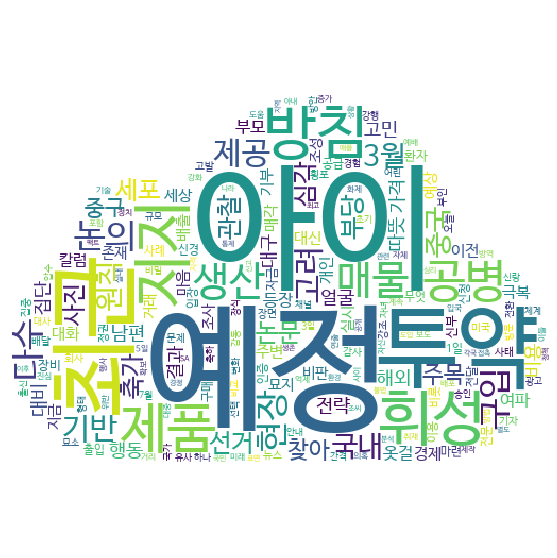

In [14]:
wordcloud = WordCloud( font_path = '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothic.ttf', 
                       stopwords = stopwords_kr,
                       background_color = 'white', 
                       mask=img_array,
                       width = 800, height = 600).generate(' '.join(nouns))
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()  


In [29]:
wordcloud.to_file("simple.png")